## Example for 2 Qubits

In [115]:
# importing Qiskit
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram

you can try to skip the next step with the token first, to see, if it works without

You might need to sign into or register at https://quantum-computing.ibm.com/lab, get your token in the dashboard and paste it here:

In [ ]:
# MY_TOKEN = 'TOKEN HERE'
# IBMQ.save_account(MY_TOKEN)

In [116]:
n = 2 # number of qubits

# size of circuit, 2 qubits and 2 classical bits(to measure)
grovers_alg_circuit = QuantumCircuit(n,n)

In [117]:
# apply hadamard gate on qubits for superposition
def init_qubits(circuit, qubits):
   for qubit in qubits:
        circuit.h(qubit)
   return circuit

In [118]:
# apply hadamard gate for superposition
grovers_alg_circuit = init_qubits(grovers_alg_circuit, [0,1])

In [119]:
# oracle for 11
grovers_alg_circuit.cz(0,1)
grovers_alg_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘   
c: 2/════════

In [120]:
# diffuser 
grovers_alg_circuit.h([0,1])
grovers_alg_circuit.z([0,1])
grovers_alg_circuit.cz(0,1)
grovers_alg_circuit.h([0,1])

In [121]:
grovers_alg_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘
c: 2/══════════════════════════

In [122]:
# measure the qubits
grovers_alg_circuit.measure_all()

Jetzt auf einem echten Quantencomputer

In [123]:
provider = IBMQ.get_provider(hub='ibm-q')

In [124]:
# try least busy instead
# backend = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
#                                    not x.configuration().simulator and x.status().operational==True))

In [125]:
# use ibmq_belem, which is one of the less busier QCs
# or use the code in the cell above and comment this cell's code
backend = provider.get_backend('ibmq_belem')

In [126]:
# execute job with 10.000 shots (can be put up to 20.000)
job = execute(grovers_alg_circuit, backend, shots=10000)
job.job_id()


'63ebc7e6fff8d30dc67f66c5'

In [127]:
# look if the job is done
job_monitor(job, interval=2)

Job Status: job has successfully run


In [128]:
# get results
results = job.result()


In [129]:
# get counts for each possible state
answer = results.get_counts(grovers_alg_circuit)

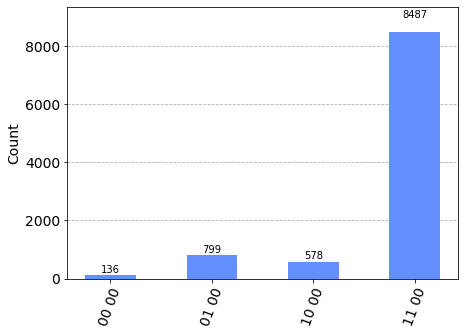

In [130]:
plot_histogram(answer)